In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as std 
import numpy as np

In [2]:
df_net=pd.read_csv('Netflix TV Shows and Movies.csv')

In [3]:
df_net

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [4]:
df_net.isnull().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [5]:
list1=list(df_net['age_certification'].fillna(method='ffill'))
# filling null values 

In [6]:
df_net['age_certification']=list1

In [7]:
list2=list(df_net['imdb_votes'].fillna(method='ffill'))

In [8]:
df_net['imdb_votes']=list2

In [9]:
list3=list(df_net['description'].fillna(method='ffill'))

In [10]:
df_net['description']=list3

In [11]:
df_net.isnull().sum()

index                0
id                   0
title                0
type                 0
description          0
release_year         0
age_certification    0
runtime              0
imdb_id              0
imdb_score           0
imdb_votes           0
dtype: int64

In [12]:
df_net.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.283000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.334942e+04
std,1525.215067,7.346098,38.915974,1.160932,8.701102e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.150000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.272000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.013650e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [13]:
# Content Popularity Over Time:

# How has the popularity of movies and TV shows changed over the years?
# Can you visualize the trend in audience interest or viewership?

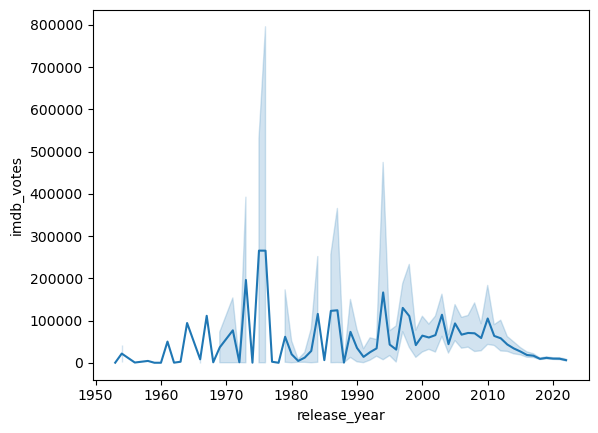

In [14]:
sb.lineplot(data=df_net,x='release_year',y='imdb_votes')
plt.show()

In [15]:
# Impact of IMDb Scores on Viewership:

# Is there a correlation between IMDb scores and the number of votes a movie or TV show receives?
# How can you represent this relationship visually?

In [16]:
r=df_net['imdb_score'].corr(df_net['imdb_votes'])
r=round(r,2)

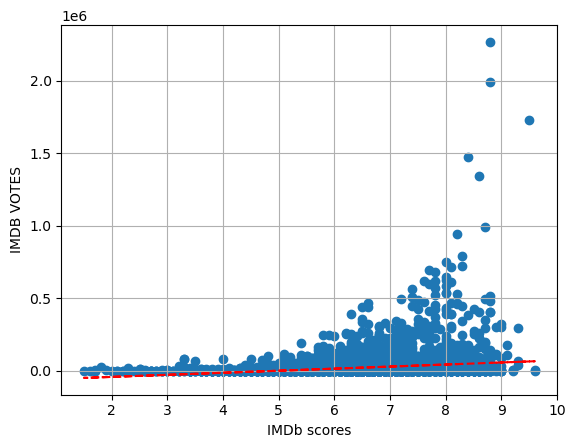

In [17]:
x=df_net['imdb_score']
y=df_net['imdb_votes']
plt.show()
plt.grid()
plt.xlabel('IMDb scores')
plt.ylabel('IMDB VOTES')
plt.scatter(x,y)
z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x),'r--')
plt.show()

In [18]:
# Age Certification and Viewer Base:

# What is the distribution of viewer age certifications among popular movies and TV shows?
# Can you create a pie chart or bar chart to show the percentage breakdown?

In [19]:
df_value=df_net['age_certification'].value_counts()
data=df_value.values
text=df_value.index


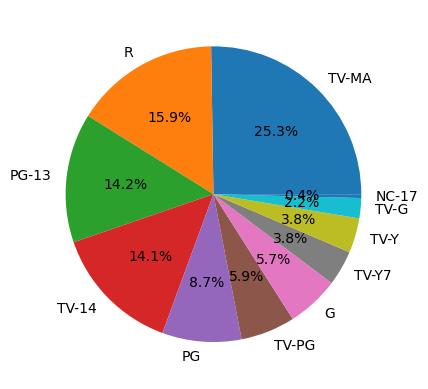

In [20]:
plt.pie(data,labels=text,autopct='%.1f%%')
plt.show()

In [21]:
# Runtime Preference and Engagement:

# Do viewers prefer shorter or longer content, and does this correlate with IMDb scores?
# How can you visually represent the relationship between runtime and IMDb scores?

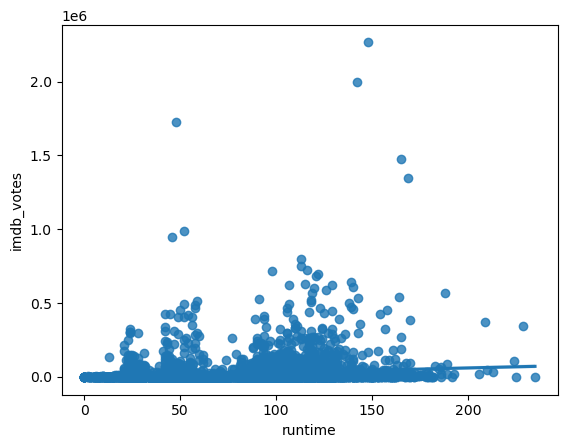

In [22]:
sb.regplot(data=df_net,x='runtime',y='imdb_votes')
plt.show()

# viewers are prefer medium movie time as we can see most of votes are comes between 100 to 150 runtime 

In [23]:
# Genre Analysis for Business Strategy:

# Which genres tend to have higher IMDb scores and greater viewership?
# Can you create a comparative chart to assist in business strategy for content creation?

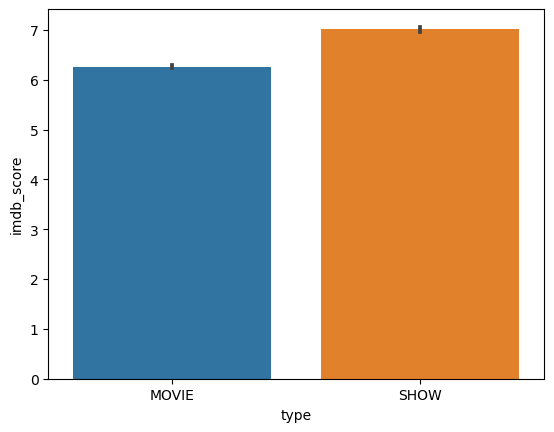

In [24]:
sb.barplot(data=df_net,x='type',y='imdb_score')
plt.show()

In [25]:
# Impact of Age Certification on IMDb Scores:

# Is there a notable difference in IMDb scores based on age certification (G, PG, R, etc.)?
# How can you visually present this impact?

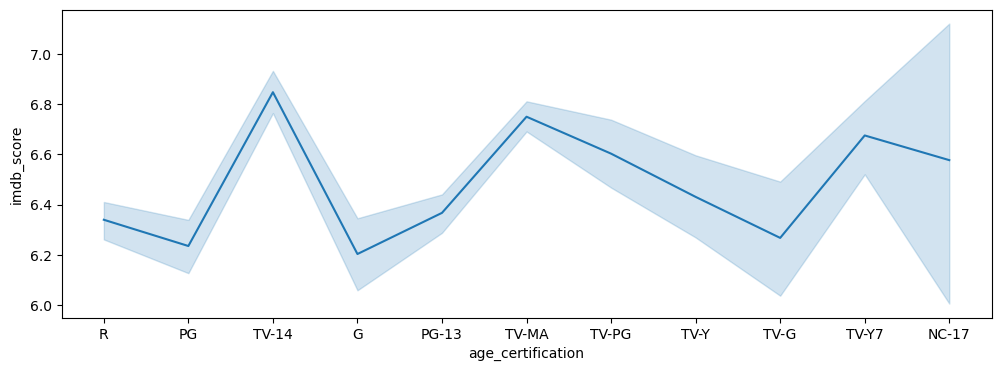

In [26]:
plt.figure(figsize=(12,4))
sb.lineplot(data=df_net,x='age_certification',y='imdb_score')
plt.show()
# very high diffrence in TV-14 and G certification 

In [27]:
# Viewer Engagement Over the Years:

# How has viewer engagement (votes, scores) evolved over the years?
# Can you create a line chart or area chart to illustrate this trend? 

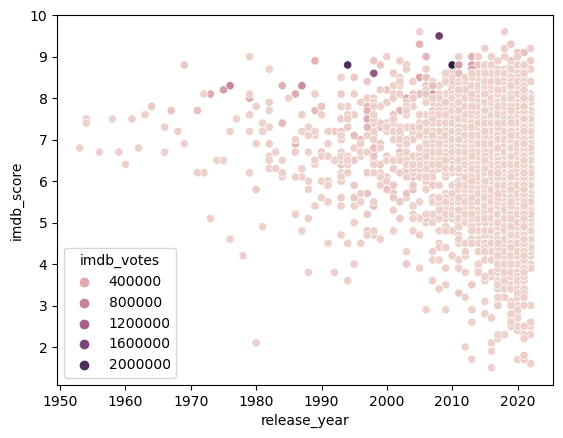

In [28]:
sb.scatterplot(data=df_net,x='release_year',y='imdb_score',hue='imdb_votes')
plt.show()

In [29]:
# Distribution of Content Types:

# What is the distribution of movies and TV shows in the dataset?
# How can you visually represent the proportion of each content type?

In [30]:
df_t=df_net['type'].value_counts()
data=df_t.values
text=df_t.index

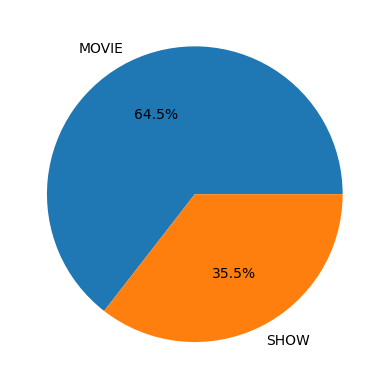

In [32]:
plt.pie(data,labels=text,autopct='%.1f%%')
plt.show()
